# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pickle

training_file = "/data/traffic-signs-data/train.p"
testing_file = "/data/traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
n_train = len(X_train)
n_test = len(X_test)
image_shape = X_train[0].shape
n_classes = len(set(y_train))
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

showing 5 random samples & histogram of labels


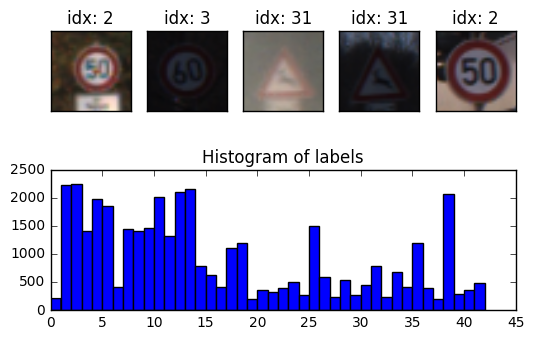

Label with the most number of training samples:  2 ( 2250 samples)
Label with the least number of training samples:  0 ( 210 samples)


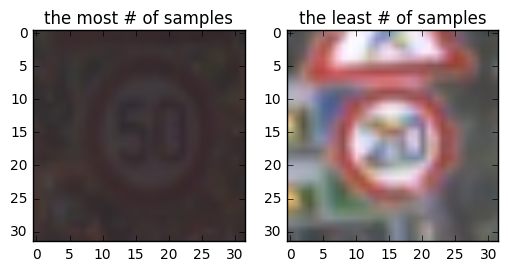

In [3]:
import matplotlib.pyplot as plt
import random
import numpy as np
%matplotlib inline

print("====================================================================")
print("showing 5 random samples & histogram of labels")
plt.figure(1)
col = 5
axs = []
for i in range(col):
    ridx = random.randint(0, n_train)
    
    axs.append(plt.subplot2grid((2, col), (0, i)))
    axs[i].imshow(X_train[ridx])
    axs[i].set_title("idx: %d"%y_train[ridx])
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)

ax2 = plt.subplot2grid((2, col), (1, 0), colspan=col)
hist, bin_edges = np.histogram(y_train, bins=np.arange(n_classes))
ax2.hist(y_train, bins=np.arange(n_classes))
ax2.set_title("Histogram of labels")

plt.show()


plt.figure(2)
maxIdx = np.argmax(hist)
minIdx = np.argmin(hist)
print("====================================================================")
print("Label with the most number of training samples: ", maxIdx, "(", hist[maxIdx], "samples)")
idx = 0
while True:
    if y_train[idx] == maxIdx:
        break;
    idx += 1
axMax = plt.subplot2grid((1, 2), (0, 0))
axMax.imshow(X_train[idx])
axMax.set_title("the most # of samples")
print("Label with the least number of training samples: ", minIdx, "(", hist[minIdx], "samples)")
idx = 0
while True:
    if y_train[idx] == minIdx:
        break;
    idx += 1
axMin = plt.subplot2grid((1, 2), (0, 1))
axMin.imshow(X_train[idx])
axMin.set_title("the least # of samples")


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
from sklearn.utils import shuffle

# Shuffle
X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

Only shuffled. I was thinking about rotation a bit, however, as the meaning of traffic sign can be easily changed by rotation, I dropped the idea. I also may have soften the # of training samples per class, as the histogram of labels are quite bumpy, however, I wanted to use as much training data as possible.

In [5]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.

# split training samples into Train/Valication sets
from sklearn.model_selection import train_test_split

tv_rat = 0.15
x_tr, x_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=tv_rat, random_state=0)

print("# of training samples ({}) split into x_tr and x_val with test_size {}".format(len(X_train), tv_rat))
print()
print("Training Set:   {} samples".format(len(x_tr)))
print("Validation Set: {} samples".format(len(x_val)))


# of training samples (39209) split into x_tr and x_val with test_size 0.15

Training Set:   33327 samples
Validation Set: 5882 samples


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

15% of shuffled training data are chosed for Validataion data. It was originally 20%, but during the training, I felt # of training data is not enough, by seeing training accuracy reaches 100% meaning nothing to learn more, or even can be overfitted. Thus, validation data is set to 15%.

Testing data has not been changed from the original data, particulary for fair evaulation.

In [6]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
### Define your architecture here.

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # first convolution layer with kernel size 7x7, output: 32
    conv1_W = tf.Variable(tf.truncated_normal(shape=(7, 7, 3, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    # 2-D convolution
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # use ReLU as an activation function
    conv1 = tf.nn.relu(conv1)
    # add max pooling for dimension reduction with stride 1, kernel size 2x2
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID')

    # the 2nd convolution layer with kernel size 5x5, output:64
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # also use ReLU for activation
    conv2 = tf.nn.relu(conv2)
    # also add max pooling for dimension reduction with stride 1, kernel size 2x2
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # very much similar to conv1 and conv2, but kernel size now is 3x3 with output number of neurons as 64
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 64), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(64))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    # ReLU activation followed by max pooling with 2x2 kernal and stride 1
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID')

    # flatten
    fc0   = flatten(conv3)
    
    # now attach fully connected layer with output size 256
    fc1_W = tf.Variable(tf.truncated_normal(shape=(3136, 256), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(256))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    # followed by ReLU activation
    fc1    = tf.nn.relu(fc1)

    # the 2nd fully connected layer with output size 128, followed also by ReLU
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(256, 128), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(128))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2    = tf.nn.relu(fc2)
    
    # the last fully connected layer finally outputing 43 neurons representing each class, which also provides the final logits
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(128, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I took the LeNet arthitecture from the class lecture. I modified a bit to take RGB 3 channel image, and also the # of output classes for softmax to 43.

Then, I made a big modification on the architecture, by tweaking kernel_size, output neurons, and strides as the size/distribution of training data is larger than MNIST data. Basically, I increased # of parameters, however, not too much as I also added an additional convolution layer.

LeNet is a very good/effective architecture for traffic sign recognition, as it has a set of convolution layers followed by fully connected layers. Later, if traffic sign detection system is being implemented, this network can be transformed to a fully convolutional network because in that way, the network can take any size of input.



In [8]:
### Train your model here.

# hyper params
EPOCHS = 52        # num. of epochs
BATCH_SIZE = 64    # batch size
LR = 0.001         # learning rate

# Tensorflow Configurations
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.85)  # to prevent OOM error on my GPU

# data placeholders
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# build network, define loss, and specify optimizer
logits = LeNet(x)
softmaxes = tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LR)
training_operation = optimizer.minimize(loss_operation)


In [9]:
# Evaluation

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0.0
    total_probs = []
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, loss, probs = sess.run([accuracy_operation, loss_operation, softmaxes], feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
        total_probs.append(probs)
    return total_accuracy / num_examples, total_loss / num_examples, total_probs

In [10]:
# TRAIN

tr_accs = []
val_accs = []

tr_losses = []
val_losses = []

with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_tr)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        x_tr, y_tr = shuffle(x_tr, y_tr)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_tr[offset:end], y_tr[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        print("EPOCH {} ...".format(i+1))
        
        tr_acc, tr_loss, _ = evaluate(x_tr, y_tr)
        tr_accs.append(tr_acc)
        tr_losses.append(tr_loss)
        
        val_acc, val_loss, _ = evaluate(x_val, y_val)
        val_accs.append(val_acc)
        val_losses.append(val_loss)
        
        print("Train Loss = {:.3f}".format(tr_loss))
        print("Validation Loss = {:.3f}".format(val_loss))
        print("Train Accuracy = {:.3f}".format(tr_acc))       
        print("Validation Accuracy = {:.3f}".format(val_acc))
        print()
        
    saver.save(sess, './tsr')
    print("Model saved")

Training...

EPOCH 1 ...
Train Loss = 1.671
Validation Loss = 1.666
Train Accuracy = 0.526
Validation Accuracy = 0.533

EPOCH 2 ...
Train Loss = 0.878
Validation Loss = 0.903
Train Accuracy = 0.732
Validation Accuracy = 0.732

EPOCH 3 ...
Train Loss = 0.557
Validation Loss = 0.613
Train Accuracy = 0.843
Validation Accuracy = 0.839

EPOCH 4 ...
Train Loss = 0.408
Validation Loss = 0.471
Train Accuracy = 0.891
Validation Accuracy = 0.877

EPOCH 5 ...
Train Loss = 0.279
Validation Loss = 0.357
Train Accuracy = 0.927
Validation Accuracy = 0.914

EPOCH 6 ...
Train Loss = 0.220
Validation Loss = 0.311
Train Accuracy = 0.943
Validation Accuracy = 0.921

EPOCH 7 ...
Train Loss = 0.183
Validation Loss = 0.267
Train Accuracy = 0.957
Validation Accuracy = 0.946

EPOCH 8 ...
Train Loss = 0.171
Validation Loss = 0.232
Train Accuracy = 0.956
Validation Accuracy = 0.947

EPOCH 9 ...
Train Loss = 0.247
Validation Loss = 0.302
Train Accuracy = 0.945
Validation Accuracy = 0.933

EPOCH 10 ...
Train Loss 

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Basically, I followed the basic network architecture of LeNet from the class.
The differences from the LeNet originally introduced from the class are as follows:

1) Batch Size & GPU Usage

Due to the memory limitation on my personal GPU (GTX 1060, 6GB Mem), I had to set Tensorflow to only use 85% of total Memory. Also, I reduced the BATCH_SIZE to 64, as I thought 64 would be enough for this project (Traffic Sign Recognition). Smaller batch size is better for training models to be enoughly generalized, not to be over-fitted.

2) Epochs & Learning rate with optimizer

I kept the initial learning_rate as 0.001, as it's a good starting point. If I start with a learning rate which is too small, then it might take long time for the training converge. As ADAM optimizer has a square root decay, by the end of the training, the learning rate would be much smaller, and hopefully the training would converge nicely. Another thing is that, as many people agree that any local minima can be considered as a global minima, I would consider the well converged model would represent well enough of the forward-propagated feature distribution of training data.

I set Epochs to around 50 (50~60) by multiple experiments.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

Some of the methods/intuition used for the training is already mentioned in Q4.
An additional method towards better training was to monitor training loss, and train/validation accuracy. When smooth these values, I can see if the training is converging correctly, or if loss is jumping around too much, I considered to lower the learning rate.



---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [11]:
# load string labels
import csv

signName = {}
with open('signnames.csv', 'r') as fp:
    frdr = csv.reader(fp, delimiter=',')
    frdr.__next__() # skip the first line
    for row in frdr:
        print("{}:{}".format(row[0], row[1]))
        signName[int(row[0])] = row[1]
        
fp.close()

print()

0:Speed limit (20km/h)
1:Speed limit (30km/h)
2:Speed limit (50km/h)
3:Speed limit (60km/h)
4:Speed limit (70km/h)
5:Speed limit (80km/h)
6:End of speed limit (80km/h)
7:Speed limit (100km/h)
8:Speed limit (120km/h)
9:No passing
10:No passing for vehicles over 3.5 metric tons
11:Right-of-way at the next intersection
12:Priority road
13:Yield
14:Stop
15:No vehicles
16:Vehicles over 3.5 metric tons prohibited
17:No entry
18:General caution
19:Dangerous curve to the left
20:Dangerous curve to the right
21:Double curve
22:Bumpy road
23:Slippery road
24:Road narrows on the right
25:Road work
26:Traffic signals
27:Pedestrians
28:Children crossing
29:Bicycles crossing
30:Beware of ice/snow
31:Wild animals crossing
32:End of all speed and passing limits
33:Turn right ahead
34:Turn left ahead
35:Ahead only
36:Go straight or right
37:Go straight or left
38:Keep right
39:Keep left
40:Roundabout mandatory
41:End of no passing
42:End of no passing by vehicles over 3.5 metric tons



Total # of files gained from the web: 11


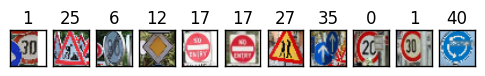

In [12]:
### Load the images and plot them here.
from os import listdir
from os.path import isfile, join

wpath = "/data/traffic-signs-data/webImgs"
web_files = [join(wpath, f) for f in listdir(wpath) if isfile(join(wpath, f))]
nwf = len(web_files)
print("Total # of files gained from the web: {}".format(nwf))
#print(web_files)

# read and resize
import scipy.misc as spmisc
import cv2

test_web_images = []
for item in sorted(web_files):
    imgbuf = spmisc.imread(item)
    #print(imgbuf.shape)
    test_web_images.append(cv2.resize(imgbuf, (32, 32)))
    #print(res.shape)

test_web_labels = [1, 25, 6, 12, 17, 17, 27, 35, 0, 1, 40]
plt.imshow(test_web_images[0])

plt.figure(1)
axs = []
for i in range(nwf):
    axs.append(plt.subplot2grid((1, nwf), (0, i)))
    axs[i].imshow(test_web_images[i])
    axs[i].set_title("{}".format(test_web_labels[i]))
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

As it can be seen on the plot above, I tried to choose difficult examples; 1) highly occluded (the 1st and 9th), 2) highly tilted (the 3rd), 3) Sign never seen but similar to one of the category (the 7th), 4) high and low resolution (the 5th and 6th), 5) multiple visible signs (the 2nd and 8th), and 6) noise sign with marking (the 11th). The results of predictions, thus, is not as good as the ones with validation data. (See the following).

To improve the results on these difficult images, data-augmentation with many jittering can be done, and if the size of training data increased by order of magnitude, making deeper architecture of the network can also be an option.


In [16]:
### Run the predictions here.

with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    sess.run(tf.global_variables_initializer())
    
    print("Restoring the last model...")
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    print("Testing...")
    print()

    # 1. Run on web images collected
    test_accuracy, loss, probs = evaluate(test_web_images, test_web_labels)
    print("Web Test Accuracy = {:.3f}%".format(test_accuracy*100))
    print("Web Test Loss = {:.3f}".format(loss))
    
    print()
    
    # 2. Run on test data
    test_accuracy2, loss2, probs2 = evaluate(X_test, y_test)
    print("Testing data Accuracy = {:.3f}%".format(test_accuracy2*100))
    print("Testing data Loss = {:.3f}".format(loss2))
    
    print()

Restoring the last model...
INFO:tensorflow:Restoring parameters from ./tsr
Testing...

Web Test Accuracy = 54.545%
Web Test Loss = 33.987

Testing data Accuracy = 93.072%
Testing data Loss = 0.924



### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

This is already answered above. (Accuracy along with the loss)

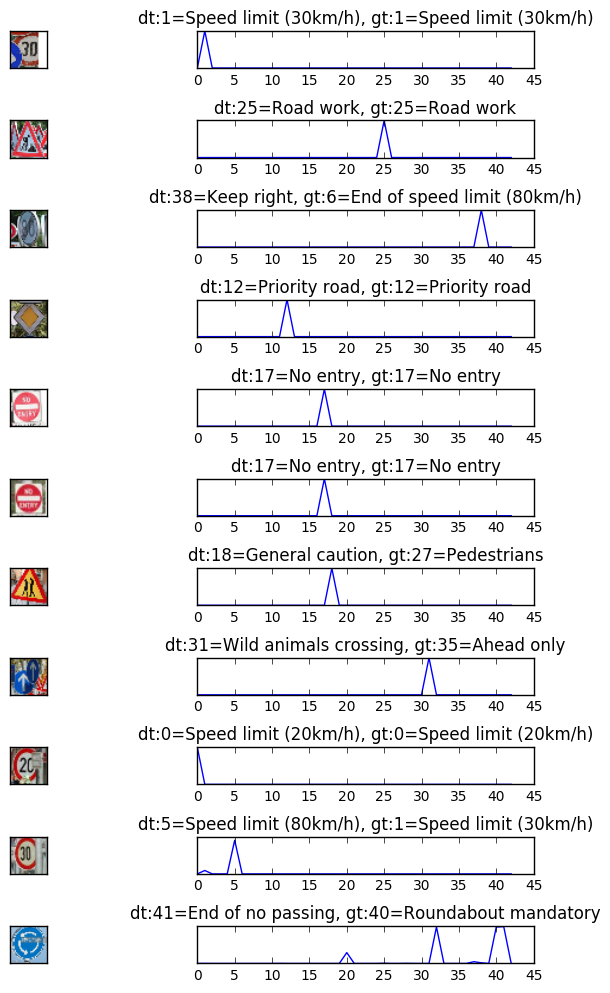


Top-1 Accuracy double-check: 54.545%



In [17]:
### Visualize the softmax probabilities here.

#plt.figure(5)

fig = plt.figure(figsize=(8,10), dpi=80)
correct = 0
for i, item in enumerate(probs[0]):
    detection = np.argmax(item)
    detlbl = signName[detection]
    
    groundtruth = test_web_labels[i]
    gtlbl = signName[groundtruth]
    
    if detection == groundtruth:
        correct += 1
    
    ax = plt.subplot2grid((nwf, 2), (i, 1))
    ax.plot(item)
    ax.set_title("dt:{}={}, gt:{}={}".format(detection, detlbl, groundtruth, gtlbl))
    ax.get_yaxis().set_visible(False)
    
    ax2 = plt.subplot2grid((nwf, 2), (i, 0))
    ax2.imshow(test_web_images[i])
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
   
plt.tight_layout()
plt.show()

print()
print("Top-1 Accuracy double-check: {:.3f}%".format(correct/nwf*100))
print()

In [34]:
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    sess.run(tf.global_variables_initializer())
    
    print()
    
    
    # top-3 accuracy on selected images from web
    correct = 0
    for i, item in enumerate(probs[0]):
        values, indices = sess.run(tf.nn.top_k(tf.constant(item), k=3))
        print("Correct prediction: ", signName[test_web_labels[i]])
        prediction_str = "|"
        for cntr, topidx in enumerate(indices):
            prediction_str += signName[topidx] + " with " + format(values[cntr], '.3f') + " | "
        print("Top-3 Prediction: ", prediction_str)
        if test_web_labels[i] in indices:
            correct += 1
            
        print("\n")
    new_acc = correct/nwf*100
    print("(Web Images)\t Top-3 Accuracy: {:.3f}% \t ({:.3f}% up)".format(new_acc, new_acc - test_accuracy*100))
        
    # top-3 accuracy on testing data
    correct = 0
    for i, item in enumerate(probs2[0]):
        values, indices = sess.run(tf.nn.top_k(tf.constant(item), k=3))
        
        if y_test[i] in indices:
            correct += 1
            
    new_acc = correct/len(probs2[0])*100
    print("(Testing data)\t Top-3 Accuracy: {:.3f}% \t ({:.3f}% up)".format(new_acc, new_acc - test_accuracy2*100))

    print()


Correct prediction:  Speed limit (30km/h)
Top-3 Prediction:  |Speed limit (30km/h) with 1.000 | Speed limit (20km/h) with 0.000 | Speed limit (70km/h) with 0.000 | 


Correct prediction:  Road work
Top-3 Prediction:  |Road work with 1.000 | Speed limit (20km/h) with 0.000 | Speed limit (30km/h) with 0.000 | 


Correct prediction:  End of speed limit (80km/h)
Top-3 Prediction:  |Keep right with 1.000 | Road work with 0.000 | Priority road with 0.000 | 


Correct prediction:  Priority road
Top-3 Prediction:  |Priority road with 1.000 | Speed limit (20km/h) with 0.000 | Speed limit (30km/h) with 0.000 | 


Correct prediction:  No entry
Top-3 Prediction:  |No entry with 1.000 | Speed limit (20km/h) with 0.000 | Speed limit (30km/h) with 0.000 | 


Correct prediction:  No entry
Top-3 Prediction:  |No entry with 1.000 | Speed limit (20km/h) with 0.000 | Speed limit (30km/h) with 0.000 | 


Correct prediction:  Pedestrians
Top-3 Prediction:  |General caution with 1.000 | Speed limit (20km/h)

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

Q8 is answered right above the question itself.
(included more detail insights regarding on the prediction on the cell above)
Also, when looking at the Top-3 probability distribution for each example, the model mostly were too strong even on wrong prediction. However, for the last example, which was "Roundabout mandatory", where it predicted correctly as the 3rd prediction, shows that the model couldn't exactly tell what it was by providing very similar probability of each 3 predictions. The learned model seems to learn simple and trivial examples such as "No Entry" and predicts it really well, but, it seems to be confused when asked to predict speed limit signs like "80km/s" or "30km/s", which are actually visually similar even to humans.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.